# Задача 4.2

In [25]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Из теоретических задач 3 - 5:
$$$$ $\frac{\overline{X}}{m}$ - эффективная оценка параметра p для выборки из биномиального распределения с параметрами (m, p), $\frac{1}{I_X(p)} = \frac{p(1 - p)}{mn}$
$$$$ $\overline{X}$ - эффективная оценка $\frac{1}{\theta}$ для выборки из экспоненциального распределения с параметром $\theta$, $\frac{1}{I_X(p)} = \frac{\theta^2}{n}$
$$$$ $\overline{X}$ - эффективная оценка $a$ для выборки из нормального распределения с известным $\sigma^2$ 
$\frac{1}{I_X(\sigma^2)} = \frac{\sigma^2}{n}$
$$$$ $\overline{(X - a)^2}$ - эффективная оценка $a$ для выборки из нормального распределания с известным $a$

Сгенерируем выборки из распределений задач 3 - 5, неизвестные параметры - случайным образом из Beta(1, 2):

In [57]:
N = 1000
m = 50
a = 3
sigma_2 = 2.1
p = sps.beta.rvs(1, 2, size = 1)
expon_scale = sps.beta.rvs(1, 2, size = 1)
rand_sigma_2 = sps.beta.rvs(1, 2, size = 1)
rand_a = sps.beta.rvs(1, 2, size = 1)

In [58]:
binom_sample = sps.binom.rvs(m, p, size = N)
expon_sample = sps.expon.rvs(loc = 0, scale = expon_scale, size = N)
norm_sample_a = sps.norm.rvs(loc = a, scale = rand_sigma_2, size = N) #известное а
norm_sample_s = sps.norm.rvs(loc = rand_a, scale = sigma_2, size = N) #известное sigma^2

Для каждого n <= N найдем эффективные оценки и бутстрепные оценки дисперсии:

In [59]:
s = np.arange(1, N + 1, dtype = 'float')
effective_estimation_binom = binom_sample.cumsum()  / s / m
effective_estimation_expon = expon_sample.cumsum() / s
effective_estimation_norm_a = norm_sample_a.cumsum() / s
effective_estimation_norm_s = ((norm_sample_s - a) ** 2).cumsum() / s

# Биномиальное распределение

In [60]:
k = 500

Для оценки $\frac{\overline{X}}{m}$ :

In [67]:
var_bootstrap_estimation_binom = np.empty(N)
for i in range(N):
    effective_estimation_bootstrap_sample = np.zeros(k)
    for j in range(k):
        effective_estimation_bootstrap_sample[j] = sps.binom.rvs(m, effective_estimation_binom[i], size = i + 1).mean() / m
    var_bootstrap_estimation_binom[i] = effective_estimation_bootstrap_sample.var()

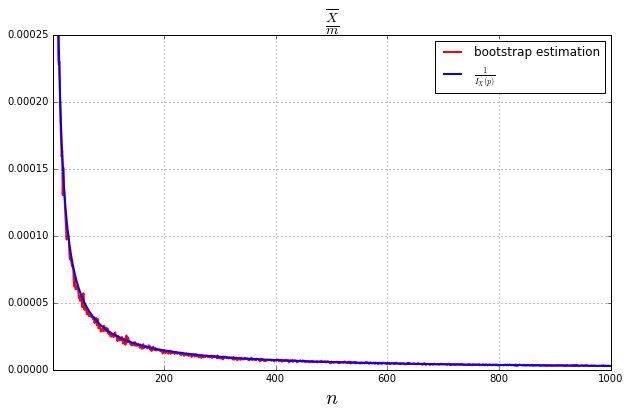

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(s, var_bootstrap_estimation_binom, color='red', linewidth=2, label = 'bootstrap estimation')
plt.plot(s, (1 / s) * p * (1 - p) /m , color='blue', linewidth=2, label =r'$\frac{1}{I_X(p)}$')

plt.legend()
plt.xlim((1, N))
plt.ylim((0, 0.00025))
plt.xlabel('$n $', fontsize = 20)
plt.title(r'$\frac{\overline{X}}{m}$', fontsize = 20)
plt.grid() 

Для оценки $\frac{X_1}{m}$:

In [71]:
var_bootstrap_estimation_binom_2 = np.empty(N)
for i in range(N):
    var_bootstrap_estimation_binom_2[i] = (sps.binom.rvs(m, effective_estimation_binom[i], size = k) / float(m)).var()

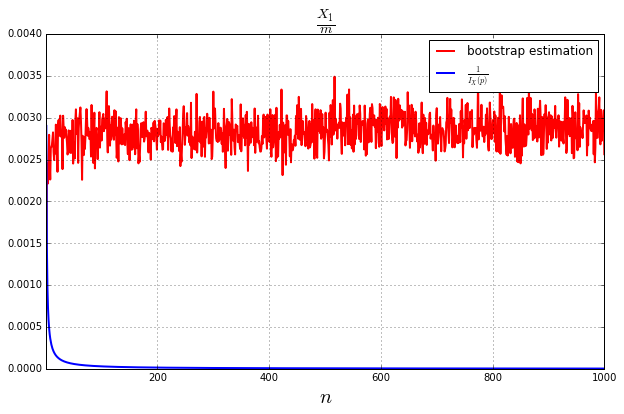

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(s, var_bootstrap_estimation_binom_2, color='red', linewidth=2, label = 'bootstrap estimation')
plt.plot(s, (1 / s) * p * (1 - p) /m , color='blue', linewidth=2, label =r'$\frac{1}{I_X(p)}$')

plt.legend()
plt.xlim((1, N))
plt.ylim((0, 0.004))
plt.xlabel('$n $', fontsize = 20)
plt.title(r'$\frac{X_1}{m}$', fontsize = 20)
plt.grid() 

Бутстрепная оценка дисперсии эффективной оценки практически совпадает с нижней оценкой дисперсии из неравенства Крамера-Рао. Для другой же несмещенной оценки бустрепная оценка выше нижней оценки, так как оценка не является эффективной.

# Нормальное распределение с известным a:

Для оценки  $\overline{X}$:

In [102]:
var_bootstrap_estimation_norm_a = np.empty(N)
for i in range(N):
    effective_estimation_bootstrap_sample = np.zeros(k)
    for j in range(k):
        effective_estimation_bootstrap_sample[j] = sps.norm.rvs(loc = a, scale = effective_estimation_norm_a[i], size = i + 1).mean()
    var_bootstrap_estimation_norm_a[i] = effective_estimation_bootstrap_sample.var()

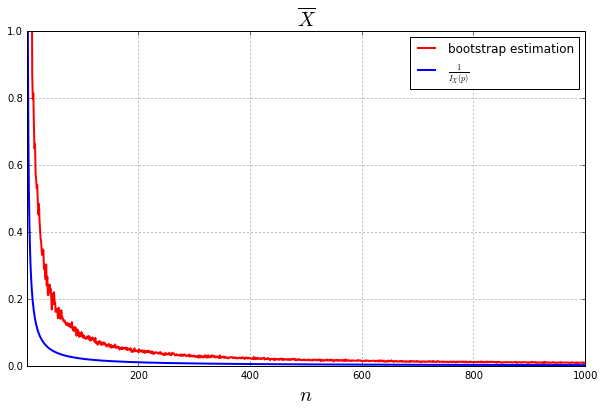

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(s, var_bootstrap_estimation_norm_a, color='red', linewidth=2, label = 'bootstrap estimation')
plt.plot(s, (1 / s) * sigma_2 , color='blue', linewidth=2, label =r'$\frac{1}{I_X(p)}$')

plt.legend()
plt.xlim((1, N))
plt.ylim((0, 1))
plt.xlabel('$n $', fontsize = 20)
plt.title(r'$\overline{X}$', fontsize = 20)
plt.grid() 